In [ ]:
### Things to do - load in single cell data
### Align Cell Types
### Psuedobulk and limit data to cell types 
### check coexpression for every gene with every other gene - slow 


In [2]:
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse
from scipy import stats


In [3]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
maize_single_cell.var.set_index('_index', inplace= True)
arabi_single_cell.var.set_index('_index', inplace= True)

In [4]:
maize_single_cell.obs

,orig.ident,nCount_RNA,nFeature_RNA,DataSet,integrated_snn_res.1,seurat_clusters,test_res.1,determinate,subcluster9,mygraph_res.1
AAACCCAAGAGTCACG-1_1,A,20391.0,6774,A,3,14,6,14,14,6
AAACCCACACTGGCCA-1_1,A,6045.0,3397,A,3,9,14,9_1,9_1,14
AAACGAAAGTGCAAAT-1_1,A,29559.0,7397,A,14,1,1,1,1,1
AAACGAAGTATCGTGT-1_1,A,11369.0,4750,A,4,2,7,2,2,7
AAAGAACAGGTGCTAG-1_1,A,37426.0,8552,A,5,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAAACGAGC-1_4,D,22506.0,5823,D,9,8,13,8,8,13
TTTGGTTCAGTAGATA-1_4,D,22299.0,6393,D,3,6,11,6,6,11
TTTGGTTTCGAGTCCG-1_4,D,14269.0,5479,D,8,9,14,9_0,9_0,14
TTTGGTTTCGCTTTAT-1_4,D,12012.0,4898,D,8,9,14,9_0,9_0,14


In [13]:
arabi_single_cell.obs['seurat_clusters'].astype(str)

AAACCCAAGGGATGTC-1_1    3
AAACCCACAAATAGCA-1_1    6
AAACCCACAGAGAATT-1_1    7
AAACCCAGTCTCGGAC-1_1    2
AAACCCAGTGAAGCGT-1_1    1
                       ..
TTTGTTGCAGAGTAAT-1_2    2
TTTGTTGCATGTCAGT-1_2    2
TTTGTTGTCGACACCG-1_2    8
TTTGTTGTCGCCTATC-1_2    2
TTTGTTGTCGGAGCAA-1_2    7
Name: seurat_clusters, Length: 20224, dtype: object

In [24]:
arabi_single_cell.obs['integrated_snn_res.0.75'] = arabi_single_cell.obs['integrated_snn_res.0.75'].astype(str)

In [19]:
list_of_not_correct_labels = ['seurat_clusters','RNA_snn_res.0.5','percent.mt', 'integrated_snn_res.0.5',]

In [20]:
arabi_single_cell.obs = arabi_single_cell.obs.drop(columns= list_of_not_correct_labels)

KeyError: "['seurat_clusters', 'RNA_snn_res.0.5'] not found in axis"

In [ ]:
arabi_single_cell.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,source,integrated_snn_res.0.5,integrated_snn_res.0.75,integrated_snn_res.1,integrated_snn_res.1.2,integrated_snn_res.1.5,...,integrated_snn_res.0.45,integrated_snn_res.0.25,integrated_snn_res.0.7,integrated_snn_res.0.8,integrated_snn_res.0.65,integrated_snn_res.0.6,integrated_snn_res.0.55,integrated_snn_res.0.53,integrated_snn_res.0.52,integrated_snn_res.0.54
AAACCCAAGGGATGTC-1_1,xu41_l151,11263.0,3178,0.000000,xu41,2,0,5,5,0,...,4,0,2,0,1,4,4,2,3,3
AAACCCACAAATAGCA-1_1,xu41_l151,4717.0,2372,0.021200,xu41,4,5,2,2,1,...,5,2,6,5,6,3,3,5,4,6
AAACCCACAGAGAATT-1_1,xu41_l151,2507.0,1423,0.000000,xu41,7,13,12,16,17,...,7,4,12,12,12,11,11,7,6,7
AAACCCAGTCTCGGAC-1_1,xu41_l151,3596.0,1394,0.027809,xu41,0,12,11,11,10,...,0,1,0,11,0,0,0,0,0,2
AAACCCAGTGAAGCGT-1_1,xu41_l151,3468.0,1133,0.000000,xu41,5,9,6,3,5,...,2,1,7,2,3,5,8,9,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGAGTAAT-1_2,xu42_l151,23882.0,6459,0.008375,xu42,0,12,11,11,10,...,0,1,0,11,0,0,0,0,0,2
TTTGTTGCATGTCAGT-1_2,xu42_l151,21439.0,5364,0.004664,xu42,5,4,3,12,12,...,2,1,0,2,0,0,0,0,0,2
TTTGTTGTCGACACCG-1_2,xu42_l151,6479.0,2714,0.000000,xu42,8,8,7,7,2,...,8,2,8,7,7,7,7,8,8,8
TTTGTTGTCGCCTATC-1_2,xu42_l151,2002.0,1211,0.000000,xu42,0,4,3,8,8,...,0,1,0,4,0,0,0,0,0,2


In [23]:
arabi_single_cell.obs['integrated_snn_res.0.75'].value_counts() ### 

0     1893
1     1832
2     1747
3     1513
4     1489
5     1428
6     1323
7     1205
8     1200
9     1193
10    1135
11     913
12     837
13     833
14     815
15     651
16     159
17      58
Name: integrated_snn_res.0.75, dtype: int64

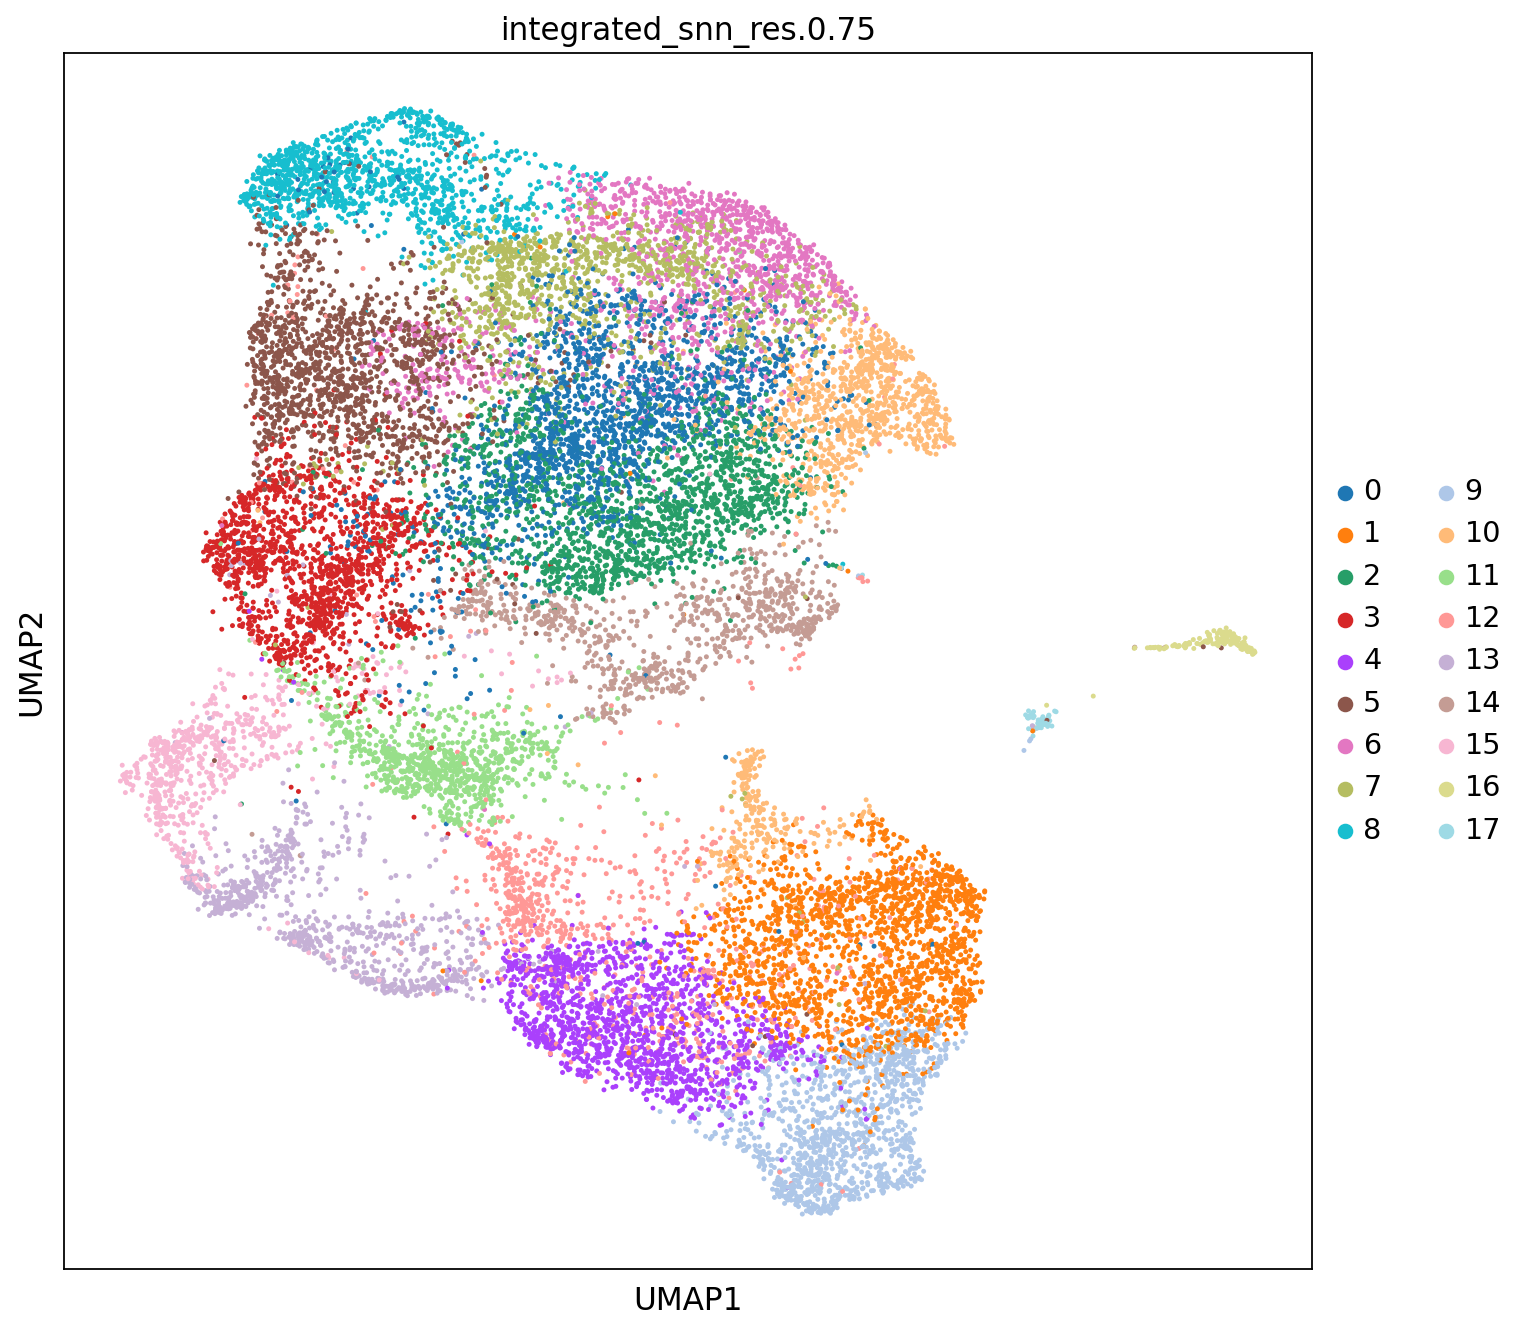

In [25]:
sc.set_figure_params(figsize=(10, 10))
sc.pl.umap(arabi_single_cell, color=['integrated_snn_res.0.75'], use_raw= False, s = 20) ### This is the correct one